In [215]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from tensorflow.keras.optimizers import RMSprop,Adam,Adadelta
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [216]:
dataset_path = "C:\\Users\\ASLAM\\Desktop\\Bootcamp\\Day6\\digits"

images = []
labels = []

for digit in range(10):
    folder_path = os.path.join("C:\\Users\\ASLAM\\Desktop\\Bootcamp\\Day6\\digits", str(digit))  
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        if img is None:
            print(f"Skipping corrupt image: {img_path}")
            continue
        
        img = cv2.resize(img, (28, 28))  
        img = img / 255.0  
        images.append(img)
        labels.append(digit)

X = np.array(images).reshape(-1, 28, 28, 1)  
y = to_categorical(labels, num_classes=10) 

print("Dataset Shape:", X.shape)  


Dataset Shape: (10160, 28, 28, 1)


In [217]:
model = Sequential([
    Conv2D(3, (3,3), activation='relu', input_shape=(28,28,1)), 
    Flatten(),  
    Dense(784, activation='relu'),  
    Dense(10, activation='softmax') 
])

In [218]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [219]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.6992 - loss: 1.0014 - val_accuracy: 0.9464 - val_loss: 0.1832
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9590 - loss: 0.1529 - val_accuracy: 0.9710 - val_loss: 0.1043
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9788 - loss: 0.0738 - val_accuracy: 0.9656 - val_loss: 0.0977
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9889 - loss: 0.0473 - val_accuracy: 0.9724 - val_loss: 0.0795
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9933 - loss: 0.0296 - val_accuracy: 0.9749 - val_loss: 0.0629
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9966 - loss: 0.0175 - val_accuracy: 0.9823 - val_loss: 0.0553
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9989 - loss: 0.0120 - val_accuracy: 0.9803 - val_loss: 0.0602
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9987 - loss: 0.0094 - val_accu

In [220]:

dummy_input = np.random.rand(1, 28, 28, 1).astype(np.float32)  
_ = model(dummy_input)  

In [221]:
conv_layer = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
feature_maps = conv_layer.predict(dummy_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


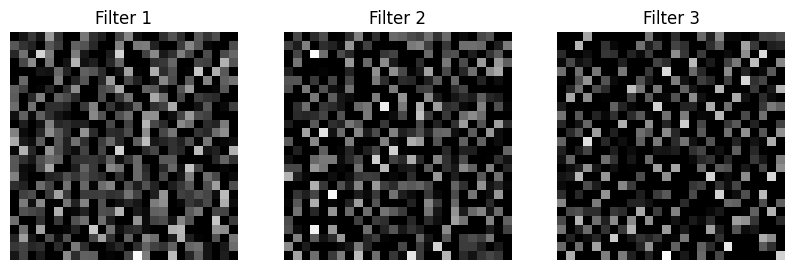

In [222]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i in range(3):  
    plt.subplot(1, 3, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='gray', interpolation='nearest')
    plt.title(f"Filter {i+1}")
    plt.axis("off")

plt.show()

In [223]:
_, accuracy = model.evaluate(X, y)
print(f"Initial Accuracy: {accuracy:.4f}")

318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9965 - loss: 0.0109
Initial Accuracy: 0.9956
